#Analisando o arqquivo Churn.csv

In [138]:
#Atualizado 08/12/2022 as 13:40
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import statistics as sts
import math as ma #from math import ceil #amostra Sistematica
##
from scipy import stats
#from scipy.stats import norm, skewnorm

#IMPORTANDO BIBLIOTECAS  - APRENDIZADO DE MÁQUINA
#import sklearn as skl # 
from sklearn.model_selection import train_test_split

#IMPORTANDO BIBLIOTECAS GRAFICAS
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as srn
import matplotlib.pyplot as plt

In [15]:
#importando e dados 
arquivo = "./BaseDeDados/Churn.csv"
dfChurn = pd.read_csv(arquivo,
                      sep=";")

#análise exploratória

In [ ]:
#print(dfChurn)
#dfChurn.head()
#dfchurn.shape

In [18]:
#ALTERANDO NOMENCLATURA DA COLUNAS
dfChurn.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produto",
                        "PossuiCartaoCredito", "Ativo", "Salario", "Saiu"]
#dfChurn.head()

#Priorizando colunas categoricas
##Coluna Estado

In [19]:
#Agrupando registros
# estados = dfChurn.groupby(["Estado"]).size()
# estados

In [20]:
#CORRIGINDO NOMENCLATURA DOS ESTADOS - (REGRAS DE NEGOCIO OU DE DIGITAÇÃO)
dfChurn.loc[dfChurn["Estado"] == "RP", "Estado"] = "PR"
#
dfChurn.loc[dfChurn["Estado"].isin(["SP", "TD"]), "Estado" ] = "RS"

In [ ]:
estados.plot.bar(color = 'blue')

In [22]:
#VERIFICO CAMPOS VAZIOS
dfChurn["Estado"].isnull().sum()

0

##Coluna Genero

In [ ]:
#Agrupando itens da coluna
genero = dfChurn.groupby(["Genero"]).size()
genero

In [24]:
#Verificando campos vazios
dfChurn["Genero"].isnull().sum()

8

#Problemas encontrados
1- nomenclatura
2-campos vazios
#Iniciando correção

In [25]:
#Alterando o campos NAs para moda 
dfChurn["Genero"].fillna('Masculino', inplace = True)
#Correção de nomenclatura
dfChurn.loc[dfChurn["Genero"] == "M", "Genero"] = "Masculino"
dfChurn.loc[dfChurn["Genero"].isin(["Fem", "F"]), "Genero" ] = "Feminino"

In [ ]:
#verifico a correção
genero = dfChurn.groupby(["Genero"]).size()
genero

In [ ]:
genero.plot.bar(color = 'blue')

#Iniciando a analise da coluna Patrimonio

In [ ]:
patrimonio = dfChurn.groupby(["Patrimonio"]).size()
patrimonio

In [29]:
#verificando campos NAs
dfChurn["Patrimonio"].isnull().sum()

0

In [ ]:
patrimonio.plot.bar(color = 'blue')

#Analisando coluna Produto, PossuiCartaoCredito, Ativo, Saiu
##Não foi encontrado erros de nomenclatura e campos NAs

In [ ]:
#verificando campos NAs
dfChurn.isnull().sum()
#dfChurn["Produto"].isnull().sum()
#dfChurn["PossuiCartaoCredito"].isnull().sum()
#dfChurn["Ativo"].isnull().sum()
#dfChurn["Saiu"].isnull().sum()

#Iniciando análise nas colunas numericas

#Score
#Não foi encontrado anomalia nas informações


In [ ]:
#Explorando dados da coluna Score
dfChurn["Score"].describe()

In [33]:
#verificando campos NAs
dfChurn["Score"].isnull().sum()

0

In [ ]:
srn.boxplot(dfChurn["Score"]).set_title("Score")


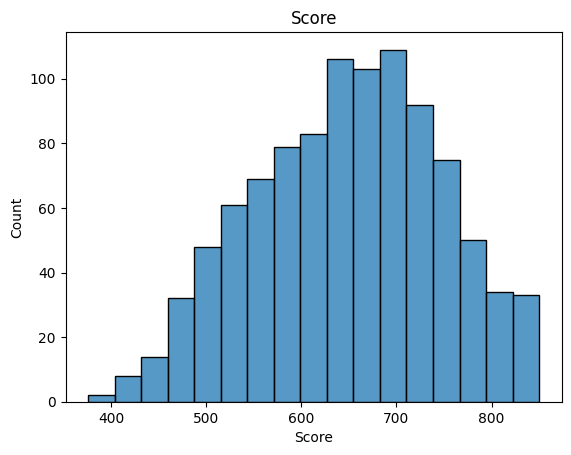

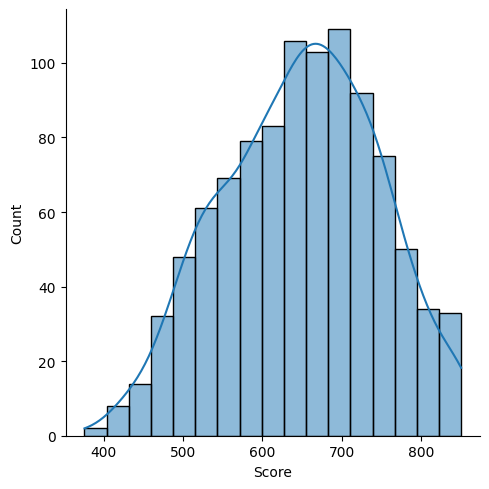

In [116]:
srn.histplot(dfChurn['Score']).set_title('Score')

srn.displot(data=dfChurn, x= "Score", kde=True)

#Iniciando análise na coluna Idade

In [ ]:
dfChurn["Idade"].describe()

In [37]:
#verificando campos NAs
dfChurn["Idade"].isnull().sum()

0

#Foi encontrado encontrado idade fora do contexto da analise
Idade  negativa e maior que 120 anos

In [38]:
#Iniciando a correção
#Realizando a alteração dos campos com a mediana
medianaIdade = sts.median(dfChurn["Idade"])
dfChurn.loc[(dfChurn["Idade"] < 0) | (dfChurn["Idade"] > 120), "Idade"] = medianaIdade

In [ ]:
#GRAFICO BOXPLOT
srn.boxplot(dfChurn["Idade"]).set_title("Idade")

In [ ]:
#srn.histplot(dfchurm['Idade']).set_title('Idade')
srn.displot(data=dfChurn, x= "Idade", kde=True)

#Iniciando a analise da coluna Saldo
##ão foi encontrado problema

In [ ]:
#dfChurn.head()
dfChurn["Saldo"].describe()

In [42]:
#verificando campos NAs
dfChurn["Saldo"].isnull().sum()

0

#Analisando coluna Salario

In [ ]:
dfChurn["Salario"].describe()

In [ ]:
#verificando campos NAs
dfChurn["Salario"].isnull().sum()

Tratamento do campo salario Nans

In [45]:
medianaSalario = sts.median(dfChurn["Salario"])
dfChurn["Salario"].fillna(medianaSalario, inplace = True)

In [46]:
dfChurn["Salario"].isnull().sum()

0

#FIM DA ANALISE

#INICIANDO CRIAÇÃO DOS GRAFICOS

In [ ]:
#GRAFICO BOXPLOT
idade = dfChurn["Idade"]
x = dfChurn["Genero"]
df = px.data.tips()
fig = px.box(df, x= x, y=idade, points="all")
fig.update_layout(title_text='Tit.: Boxplot Idade')

fig.show()

In [ ]:
from plotly.figure_factory import create_distplot
hist_data = [dfChurn["Idade"]] 
group_labels = ['Idade']
show_rug=True 
curve_type = "normal"
bin_size = 1
fig = create_distplot(hist_data, group_labels, show_rug=show_rug, curve_type =curve_type ,bin_size=bin_size)
# Add title
fig.update_layout(title_text='Tit.: Hist. Idade')
fig.show()

In [ ]:
srn.displot(data= dfChurn, x= "Saldo", kde=True)

In [ ]:
#amostra do histograma
from plotly.figure_factory import create_distplot
hist_data = [dfChurn["Idade"]] #Use list of lists to plot multiple data sets on the same plot
group_labels = ['Idade'] #Names for each data set
bin_size = 1 #Size of histogram bins. Default = 1
curve_type = "normal" #‘kde’ or ‘normal’. Default = ‘kde’
show_rug=True #Add rug to distplot? Default = True
#colors = ['#333F44']
#show_curve = True #Add curve to distplot? Default = True
# histnorm ((str)) – ‘probability density’ or ‘probability’ Default = ‘probability density’
# show_hist ((bool)) – Add histogram to distplot? Default = True
# show_rug ((bool)) – Add rug to distplot? Default = True
# colors ((list[str])) – Colors for traces.
# rug_text ((list[list])) – Hovertext values for rug_plot,
fig = create_distplot(hist_data, group_labels,show_rug=show_rug, curve_type =curve_type ,bin_size=bin_size)
# Add title
fig.update_layout(title_text='Tit.: Idade')
fig.show()




In [ ]:
#dados duplicados, buscamos pelo ID
dfChurn[dfChurn.duplicated(['Id'],keep=False)]

In [52]:
#excluimso pelo ID
dfChurn.drop_duplicates(subset="Id", keep='first',inplace=True)

##CRIANDO AMOSTRAS SIMPLES E EXTRATIFICADAS

In [58]:
dfChurnTratado  = dfChurn
dfChurnTratado.head()
dfChurnTratado.shape #(998, 12)

(998, 12)

In [ ]:
#GERANDO AMOSTRAS SIMPLES

In [67]:
#PLANTANDO UM SEMENTE PARA REPLICAÇAO FUTURA DA ALETORIEDADE DA AMOSTRA
np.random.seed(2345)
#Contendo (998) amostras de 0 a 1, com reposição e propabilidade equivalente
aleatoriedadeSimples = np.random.choice(  a = [0,1],
                                    size = 998,
                                    replace = True,
                                    p = [0.7, 0.3]
                                )

In [68]:
#Checando modelo de aletoriedade para amostra
aleatoriedadeSimples.shape #((998,))
#amostraSimples

(998,)

In [72]:
#Gerando amostra 
#AmostraSimples= dfChurnTratado.loc[ aleatoriedadeSimples ==0] 
#AmostraSimples.shape
AmostraSimples= dfChurnTratado.loc[ aleatoriedadeSimples ==1] 
AmostraSimples.shape

(302, 12)

In [76]:
#dfChurnTratado.head()
dfChurnTratado.columns

Index(['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produto', 'PossuiCartaoCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [94]:
#Gerando amostra extratificada coluna Estado
#dfChurnTratado.head()

x, _, y, _ = train_test_split(dfChurnTratado.iloc[:, 1:12],
                               dfChurnTratado.iloc[:,2],
                               test_size= 0.7,
                               stratify= dfChurnTratado.iloc[:,2])

In [ ]:
y

In [98]:
x

,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,PossuiCartaoCredito,Ativo,Salario,Saiu
476,605,PR,Feminino,31,1,11799259,1,1,1,18359877.0,0
59,614,RS,Masculino,51,4,4068592,1,1,1,4677528.0,0
327,644,RS,Feminino,46,9,9544127,1,1,0,10876105.0,1
156,758,RS,Feminino,33,7,0,2,0,0,8299647.0,0
502,774,RS,Masculino,60,5,8589155,1,1,0,7413548.0,1
...,...,...,...,...,...,...,...,...,...,...,...
517,779,PR,Masculino,37,7,12009252,2,1,0,13592572.0,0
44,660,SC,Feminino,61,5,15593111,1,1,1,15833839.0,0
944,745,RS,Masculino,36,8,6722637,1,1,0,1307896.0,0
234,585,RS,Feminino,67,5,11397897,2,0,1,9314611.0,0


In [102]:
#Media e desvio padrao
media = np.mean(x["Idade"])
media
quartil= np.quantile(x["Idade"], [0,0.25,0.5,0.75,1])
desvioP = np.std(x["Idade"], ddof = 1)
desvioP
print("Media: ", media, " | STD: ", desvioP)
#print(stats.describe(x["Idade"]))

Media:  39.12709030100334  | STD:  11.283290872552968


In [108]:
#Calculado a maior probabilidade de Tirar um pesso com mais de 30 anos
stats.norm.cdf(30,media,desvioP)
#Calculado a menor probabilidade de Tirar um pesso com mais de 30 anos
stats.norm.sf(30, media, desvioP) # calculo: 1 - stats.norm.cdf(30,media,desvioP)

0.790714591230574

In [ ]:
#Teste de normalidade
plt.hist(x["Idade"], bins=20)

In [ ]:
from plotly.figure_factory import create_distplot
hist_data = [x["Idade"]] 
group_labels = ['Idade']
show_rug=True 
curve_type = "normal"
bin_size = 3
fig = create_distplot(hist_data, group_labels, show_rug=show_rug, curve_type =curve_type ,bin_size=bin_size)
# Add title
fig.update_layout(title_text='Tit.: Hist. Idade')
fig.show()

In [ ]:
x.head()

In [ ]:
#stats.shapiro(x["Score"]) #pvalue=0.03915928676724434
#stats.shapiro(x["Idade"]) #pvalue=3.3485045292103166e-10
#stats.shapiro(x["Salario"])
stats.anderson(x["Salario"])

In [ ]:
fig, ax = plt.subplots()
stats.probplot(x["Idade"], fit = True, plot = ax)
plt.show()

In [ ]:
x.head()
fig, ax = plt.subplots()
stats.probplot(x["Score"], fit = True, plot = ax)
plt.show()